In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
# Cargar los datos de observaciones por estación desde un archivo CSV o Excel
ozo = pd.read_csv('DATA_ORIGINAL/O3.csv')
no = pd.read_csv('DATA_ORIGINAL/NO.csv')
no2 = pd.read_csv('DATA_ORIGINAL/NO2.csv')
co = pd.read_csv('DATA_ORIGINAL/CO.csv')
pm10 = pd.read_csv('DATA_ORIGINAL/PM10.csv')
pm25 = pd.read_csv('DATA_ORIGINAL/PM25.csv')
rad = pd.read_csv('DATA_ORIGINAL/RAD.csv')
spe = pd.read_csv('DATA_ORIGINAL/VEL.csv')

## Estadística descriptiva

In [3]:
#Unión de tablas
ozo1=ozo.rename(columns={'MEAN':'Ozono'})
no1=no.rename(columns={'MEAN':'Monóxido de nitrógeno'})
no21=no2.rename(columns={'MEAN':'Dióxido de nitrógeno'})
co1=co.rename(columns={'MEAN':'Monóxido de carbono'})
pm101=pm10.rename(columns={'MEAN':'PM 10'})
pm251=pm25.rename(columns={'MEAN':'PM 2.5'})
rad1=rad.rename(columns={'MEAN':'Radiación'})
spe1=spe.rename(columns={'MEAN':'Velocidad del viento'})
datau=pd.concat([ozo1, no1, no21, co1, pm101, pm251, rad1, spe1], axis=1)
datau

,FECHA,BOLIVIA,CARVAJAL,CENTRO DE ALTO RENDIMIENTO,CIUDAD BOLIVAR,FONTIBON,GUAYMARAL,JAZMIN,KENNEDY,LAS FERIAS,...,MIN AMBIENTE,PUENTE ARANDA,SAN CRISTOBAL,SUBA,TUNAL,USAQUEN,USME,COLINA,MOVIL FONTIBON,MOVIL 7MA
0,1/01/2013 0:00,NaN,6.4,2.300,NaN,NaN,2.100,NaN,NaN,8.100,...,2.3,NaN,2.7,1.3,0.4,0.7,NaN,NaN,NaN,NaN
1,1/01/2013 1:00,NaN,4.2,2.400,NaN,NaN,3.100,NaN,NaN,8.500,...,2.9,NaN,2.9,1.2,0.3,2.7,NaN,NaN,NaN,NaN
2,1/01/2013 2:00,NaN,3.4,12.400,NaN,NaN,1.900,NaN,NaN,12.900,...,1.3,NaN,1.8,0.7,0.3,1.4,NaN,NaN,NaN,NaN
3,1/01/2013 3:00,NaN,2.7,3.400,NaN,NaN,1.300,NaN,NaN,5.200,...,1.1,NaN,2.8,0.9,0.5,0.7,NaN,NaN,NaN,NaN
4,1/01/2013 4:00,NaN,1.9,8.900,NaN,NaN,1.300,NaN,NaN,2.500,...,1.2,NaN,3.0,1.8,0.8,0.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31/12/2022 19:00,5.010,NaN,16.490,17.958,37.973,2.228,11.813,31.870,5.554,...,0.4,1.8,0.4,0.3,1.3,0.7,NaN,1.5,NaN,0.8
87644,31/12/2022 20:00,6.751,NaN,18.038,21.612,25.737,2.197,20.887,34.503,13.563,...,0.5,1.3,0.2,0.4,1.0,1.2,NaN,0.6,NaN,0.5
87645,31/12/2022 21:00,6.718,NaN,11.501,20.397,37.705,0.576,13.194,32.938,15.773,...,0.5,1.2,0.7,0.4,1.3,1.0,NaN,0.6,NaN,0.2
87646,31/12/2022 22:00,4.456,NaN,13.827,12.816,26.130,0.636,14.635,31.289,11.901,...,0.5,1.0,1.0,0.3,0.6,0.4,NaN,0.5,NaN,0.2


## Tendencia de datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pylab import *
import pdb
from sklearn.linear_model import LinearRegression # to build a LR model for comparison
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points
from scipy.linalg import toeplitz
import seaborn as sns

In [22]:
ozo

,FECHA,BOLIVIA,CARVAJAL,CENTRO DE ALTO RENDIMIENTO,CIUDAD BOLIVAR,FONTIBON,GUAYMARAL,JAZMIN,KENNEDY,LAS FERIAS,MIN AMBIENTE,PUENTE ARANDA,SAN CRISTOBAL,SUBA,TUNAL,USAQUEN,USME,COLINA,MOVIL FONTIBON
0,1/01/2013 0:00,NaN,6.4,2.300,NaN,NaN,2.100,NaN,NaN,8.100,19.7,4.200,11.8,6.300,4.600,11.500,NaN,NaN,NaN
1,1/01/2013 1:00,NaN,4.2,2.400,NaN,NaN,3.100,NaN,NaN,8.500,22.8,6.200,12.4,7.800,4.600,19.300,NaN,NaN,NaN
2,1/01/2013 2:00,NaN,3.4,12.400,NaN,NaN,1.900,NaN,NaN,12.900,17.9,4.100,11.7,5.700,2.700,16.600,NaN,NaN,NaN
3,1/01/2013 3:00,NaN,2.7,3.400,NaN,NaN,1.300,NaN,NaN,5.200,13.6,4.000,10.7,3.100,7.100,13.200,NaN,NaN,NaN
4,1/01/2013 4:00,NaN,1.9,8.900,NaN,NaN,1.300,NaN,NaN,2.500,14.9,3.700,13.8,3.200,5.100,9.100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31/12/2022 19:00,5.010,NaN,16.490,17.958,37.973,2.228,11.813,31.870,5.554,NaN,7.173,NaN,14.294,9.433,6.145,3.470,6.089,19.585
87644,31/12/2022 20:00,6.751,NaN,18.038,21.612,25.737,2.197,20.887,34.503,13.563,NaN,12.950,NaN,18.699,14.063,6.748,1.530,7.873,20.735
87645,31/12/2022 21:00,6.718,NaN,11.501,20.397,37.705,0.576,13.194,32.938,15.773,NaN,11.986,NaN,17.021,15.409,12.060,5.160,6.657,18.987
87646,31/12/2022 22:00,4.456,NaN,13.827,12.816,26.130,0.636,14.635,31.289,11.901,NaN,10.653,NaN,9.785,21.807,12.109,1.610,5.277,18.976


In [25]:
## Valor diario máximo en un promedio móvil de 8 horas, hacer esto para cada estación para obtener anualmente.
def time_means(var):
    import pandas as pd
    import numpy as np

    # Leer archivo
    df = pd.read_csv(f'DATA_ORIGINAL/{var}.csv')
    df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True)
    df.set_index('FECHA', inplace=True)
    
    # Limpiar datos
    df.replace([0, 9999.], np.nan, inplace=True)
    df.sort_index(inplace=True)

    # Promedio móvil de 8 horas, centrado
    df_rolling = df.rolling(window='8H', min_periods=6).mean()

    # Valor máximo diario de esa serie suavizada
    df_daily_max = df_rolling.resample('D').max()

    # Estadísticas mensuales y semanales
    monmean = df_daily_max.groupby(df_daily_max.index.month).mean()
    monstd = df_daily_max.groupby(df_daily_max.index.month).std()
    weekmean = df_daily_max.groupby(df_daily_max.index.weekday).mean()
    weekstd = df_daily_max.groupby(df_daily_max.index.weekday).std()

    return monmean, weekmean, monstd, weekstd


def mon_tend(var):
    df = pd.read_csv('DATA_ORIGINAL/'+var+'.csv')
    df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True)
    df.set_index('FECHA', inplace=True)
    
    # Limpiar datos
    df.replace([0, 9999.], np.nan, inplace=True)
    df.sort_index(inplace=True)

    monmean = df.resample('m').mean()
    monstd = df.resample('m').std()
    return(monmean,monstd)


In [7]:
def dictionary_list(pollu):
    datasets = {}
    for var in pollu:
        datasets[var] = []
    return(datasets)

In [8]:
#Dictionary
pollu = ['O3']
linear_dt = dictionary_list(pollu)

In [9]:
linear_dt

{'O3': []}

In [10]:
#Create dictionaries!
pol_m_me = {}
pol_h_me = {}
pol_w_me = {}
pol_t_me = {}
pol_m_st = {}
pol_h_st = {}
pol_w_st = {}
pol_t_st = {}
for pol in pollu:
    pol_m_me[pol] = []
    pol_h_me[pol] = []
    pol_w_me[pol] = []
    pol_t_me[pol] = []
    pol_m_st[pol] = []
    pol_h_st[pol] = []
    pol_w_st[pol] = []
    pol_t_st[pol] = []

In [26]:
for pol in ['O3']:
    #Fill the means first
    pol_m_me[pol],pol_w_me[pol],pol_m_st[pol],pol_w_st[pol] = time_means(pol)
    #Fill the trends
    pol_t_me[pol],pol_t_st[pol] = mon_tend(pol)

In [27]:
def linear_regression(data):
    vals = data.dropna()
    init = int(vals.index[0].strftime('%Y-%m-%d %X')[0:4])
    end = int(vals.index[-1].strftime('%Y-%m-%d %X')[0:4])
    #x linear
    X = np.linspace(init, end+1, len(vals)).reshape(-1,1)
    # y values
    y = vals.values
    y[np.isnan(y)] = np.nanmean(y)
    # ------- Linear Regression -------
    # Define and fit the model
    model = LinearRegression()
    LR = model.fit(X, y)
    # Predict a few points with Linear Regression model for the grpah
    # Create 20 evenly spaced points from smallest X to largest X
    x_range = np.linspace(init, end+1, 30)
    # Predict y values for our set of X values
    y_range = model.predict(x_range.reshape(-1, 1))
    num_y = (x_range[-1]-x_range[0])
    tre = (y_range[-1]-y_range[0])/num_y
    return(x_range, y_range, tre, num_y)

def SLT(data, frac):
    lowess = sm.nonparametric.lowess
    vals=data.dropna()
    init = int(vals.index[0].strftime('%Y-%m-%d %X')[0:4])
    end = int(vals.index[-1].strftime('%Y-%m-%d %X')[0:4])
    #x lowess
    x = np.linspace(init, end+1, len(vals))
    # y values
    y=vals.values
    y[np.isnan(y)] = np.nanmean(y)
    # ------- LOWESS -------
    # Generate y_hat values using lowess, try a couple values for hyperparameters
    y_hat = lowess(y, x, frac)
    return(y_hat)

In [34]:
def plot_o3(fig, gs, pol_m_me,pol_m_st,ymin,ymax,yticks,ymin1,ymax1,yticks1,xticks,xmin,xmax,xlabel):
    color = 'darkcyan'
    titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)', '(k)', '(l)', '(m)', '(n)', '(o)', '(p)','(q)','(r)','(s)']
    var ='O3'
    week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    for i,estaciones in enumerate(pol_m_me[var].columns):
        ax = plt.subplot(gs[i])
        plt.plot(pol_m_me[var][estaciones], '-o', color = color)
        plt.plot(pol_m_me[var][estaciones] - pol_m_st[var][estaciones], linestyle = ':', color = color)
        plt.plot(pol_m_me[var][estaciones] + pol_m_st[var][estaciones], linestyle = ':', color = color)
        plt.ylim(ymin,ymax)
        plt.yticks(yticks, fontsize = 12)
        if len(pol_m_me[var][estaciones]) == 7:
            plt.xticks(xticks,week, fontsize = 12)
        elif len(pol_m_me[var][estaciones]) == 24:
            plt.xticks([0,3,6,9,12,15,18,21,23], fontsize = 12)
        else:
            plt.xticks(xticks, fontsize = 12)
        plt.title(titles[i]+' '+estaciones, loc = 'left', fontsize = 14)
        plt.xlim(xmin,xmax)
        if i < 6:
            plt.setp(ax.get_xticklabels(), visible=False)
        else:
            plt.xlabel(xlabel, fontsize = 12)
        if i == 1 or i == 2 or i == 4 or i == 5 or i == 7 or i == 8:
            plt.setp(ax.get_yticklabels(), visible=False)
        else:
            plt.ylabel('O$_{3}$ (μg m$^{-3}$)', fontsize = 12)
        plt.fill_between(xticks, pol_m_me[var][estaciones] + pol_m_st[var][estaciones],
                         pol_m_me[var][estaciones] - pol_m_st[var][estaciones], color = color, alpha = 0.05)

    plt.show()

IndexError: index 9 is out of bounds for GridSpec with size 9

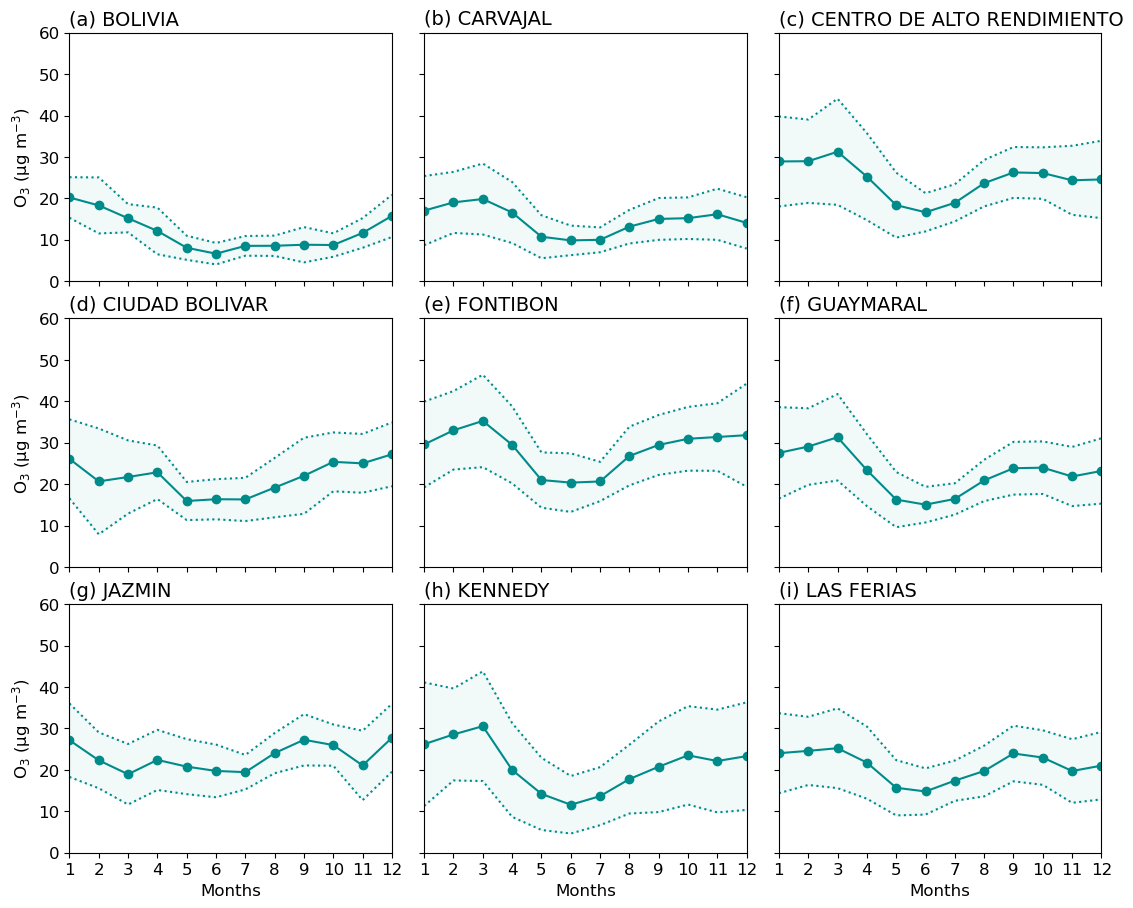

In [35]:
fig = plt.figure(figsize=(12,10))
gs = GridSpec(3,3,left = 0.09, right = 0.95, hspace=0.15, wspace=0.1, top = 0.9, bottom = 0.08)
plot_o3(fig, gs, pol_m_me,pol_m_st,0,60,np.arange(0,61,10),7,40,
          np.arange(6,41,6),np.arange(1,12.1),1,12,'Months')

In [36]:
### Continuación del plot 3x3
def plot_o3(fig, gs, pol_m_me,pol_m_st,ymin,ymax,yticks,ymin1,ymax1,yticks1,xticks,xmin,xmax,xlabel):
    color = 'darkcyan'
    titles = ['(j)', '(k)', '(l)', '(m)', '(n)', '(o)', '(p)','(q)','(r)','(s)']
    var ='O3'
    week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    for i,estaciones in enumerate(pol_m_me[var].columns):
        ax = plt.subplot(gs[i == 10 or i==11 or i==12 or i==13 or i==14 or i==15 or i==16 or i==17])
        plt.plot(pol_m_me[var][estaciones], '-o', color = color)
        plt.plot(pol_m_me[var][estaciones] - pol_m_st[var][estaciones], linestyle = ':', color = color)
        plt.plot(pol_m_me[var][estaciones] + pol_m_st[var][estaciones], linestyle = ':', color = color)
        plt.ylim(ymin,ymax)
        plt.yticks(yticks)
        if len(pol_m_me[var][estaciones]) == 7:
            plt.xticks(xticks,week)
        elif len(pol_m_me[var][estaciones]) == 24:
            plt.xticks([0,3,6,9,12,15,18,21,23])
        else:
            plt.xticks(xticks)
        plt.title(titles[i]+' '+estaciones, loc = 'left')
        plt.xlim(xmin,xmax)
        if i < 10:
            plt.setp(ax.get_xticklabels(), visible=False)
        else:
            plt.xlabel(xlabel)
        if i == 11 or i == 12 or i == 13 or i == 14 or i == 15 or i ==16:
            plt.setp(ax.get_yticklabels(), visible=False)
        else:
            plt.ylabel('O$_{3}$ (μg m$^{-3}$)')
        plt.fill_between(xticks, pol_m_me[var][estaciones] + pol_m_st[var][estaciones],
                         pol_m_me[var][estaciones] - pol_m_st[var][estaciones], color = color, alpha = 0.05)

    plt.show()

IndexError: list index out of range

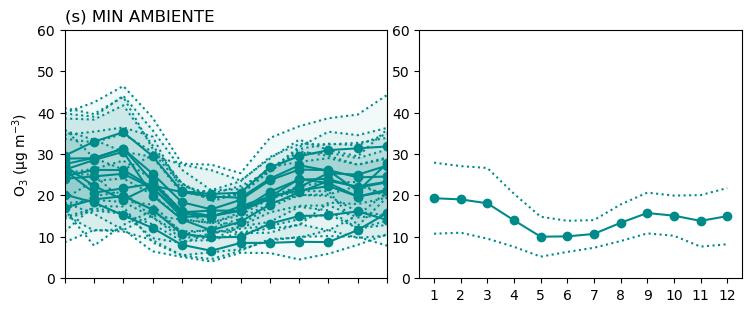

In [37]:
fig = plt.figure(figsize=(12,10))
gs = GridSpec(3,3,left = 0.09, right = 0.95, hspace=0.15, wspace=0.1, top = 0.9, bottom = 0.08)
plot_o3(fig, gs, pol_m_me,pol_m_st,0,60,np.arange(0,61,10),7,40,
          np.arange(6,41,6),np.arange(1,12.1),1,12,'Meses')

IndexError: index 9 is out of bounds for GridSpec with size 9

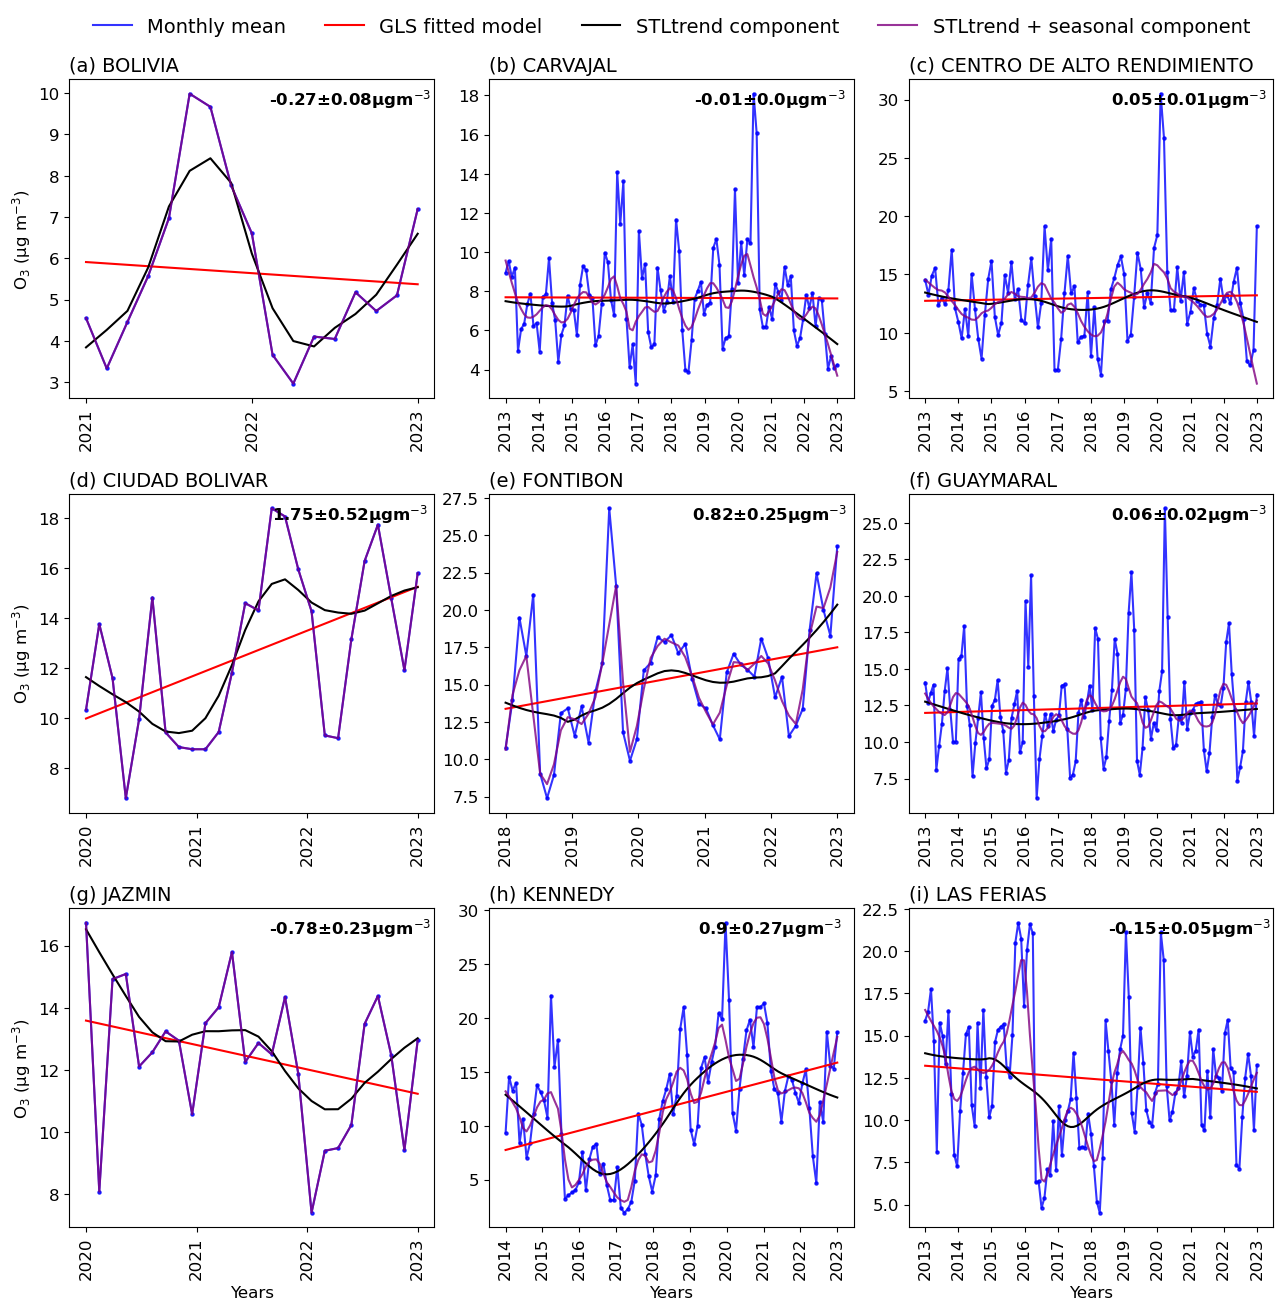

In [47]:
var = 'O3'
frac = [1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10]
titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)', '(k)', '(l)', '(m)', '(n)', '(o)', '(p)','(q)','(r)','(s)']
fig = plt.figure(figsize=(14,14))
gs = GridSpec(3,3,left = 0.09, right = 0.95, hspace=0.3, wspace=0.15, top = 0.9, bottom = 0.08)
for i,estaciones in enumerate(pol_t_me[var]):
    ax = plt.subplot(gs[i])
    #Linear regression first
    x_range,y_range,tre,num_y = linear_regression(pol_t_me[var][estaciones])
    linear_dt[var].append(np.round(tre,2))
    init = int(pol_t_me[var][estaciones].dropna().index[0].strftime('%Y-%m-%d %X')[0:4])
    end = int(pol_t_me[var][estaciones].dropna().index[-1].strftime('%Y-%m-%d %X')[0:4])
    # LOWESS second
    # Generate y_hat values using lowess, try a couple values for hyperparameters
    y_hat =  SLT(pol_t_me[var][estaciones], 2/5)
    y_hat1 = SLT(pol_t_me[var][estaciones], frac[i])
    x = np.linspace(init,end+1,len(pol_t_me[var][estaciones].dropna()))
    xticks = np.arange(init,end+1.1,1)
    plt.plot(x, pol_t_me[var][estaciones].dropna(), color = 'blue', alpha = 0.8, label = 'Monthly mean')
    plt.scatter(x, pol_t_me[var][estaciones].dropna(), color = 'blue', s = 5, alpha = 0.8)
    plt.plot(x_range, y_range, color = 'red', label = 'GLS fitted model')
    plt.plot(y_hat[:,0],y_hat[:,1], color = 'k', label = 'STLtrend component')
    plt.plot(y_hat1[:,0],y_hat1[:,1], color = 'purple', alpha = 0.8, label = 'STLtrend + seasonal component')
    if i == 0 or i == 3 or i==6:
        plt.xticks(xticks, rotation=90, fontsize = 12)
        plt.ylabel('O$_{3}$ (μg m$^{-3}$)', fontsize = 12)
    else: 
        plt.xticks(xticks, rotation=90, fontsize = 12)
        plt.ylabel('O$_{3}$ (μg m$^{-3}$)', visible=False, fontsize = 12)
    
    plt.yticks(fontsize = 12)
    ax.text(0.77,0.92,str(np.round(tre,2))+'\u00B1'+str(np.round(y_range.std()/(num_y),2))+'\u03bcgm$^{-3}$',
            size=12, fontweight='bold', ha="center", transform=ax.transAxes)
    #plt.ylim(0,120)
    if i == 6 or i == 7 or i==8:
        plt.xlabel('Years', fontsize = 12)
    else: 
        plt.xlabel('Years', visible=False, fontsize = 12) 
    plt.title(titles[i]+' '+estaciones, loc = 'left', fontsize = 14)
    if i == 1:
        plt.legend(frameon=False, bbox_to_anchor=(0.5, 1.25), loc = 'upper center', ncol = 4, fontsize = 14)
plt.savefig('Figures/'+var+'_tendency.jpg', bbox_inches = 'tight', dpi = 300)
plt.savefig('Figures/'+var+'_tendency.pdf', bbox_inches = 'tight', dpi = 300)

###COMPARACION NO NO2 CON OZONO

In [51]:
### Valores multianuales de NO y NO2
df = ozo


df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True)
df.set_index('FECHA', inplace=True)
# Limpiar datos
df.replace([0, 9999.], np.nan, inplace=True)
df.sort_index(inplace=True)

df1 = no
df1['FECHA'] = pd.to_datetime(df1['FECHA'], dayfirst=True)
df1.set_index('FECHA', inplace=True)
# Limpiar datos
df1.replace([0, 9999.], np.nan, inplace=True)
df1.sort_index(inplace=True)

df2 = no2
df2['FECHA'] = pd.to_datetime(df2['FECHA'], dayfirst=True)
df2.set_index('FECHA', inplace=True)
# Limpiar datos
df2.replace([0, 9999.], np.nan, inplace=True)
df2.sort_index(inplace=True)


df = df.resample('8h').mean().resample('d').max()
monmean = df.groupby(df.index.month).mean()

monmeanno = df1.groupby(df1.index.month).mean()
monmeanno2 = df2.groupby(df2.index.month).mean()


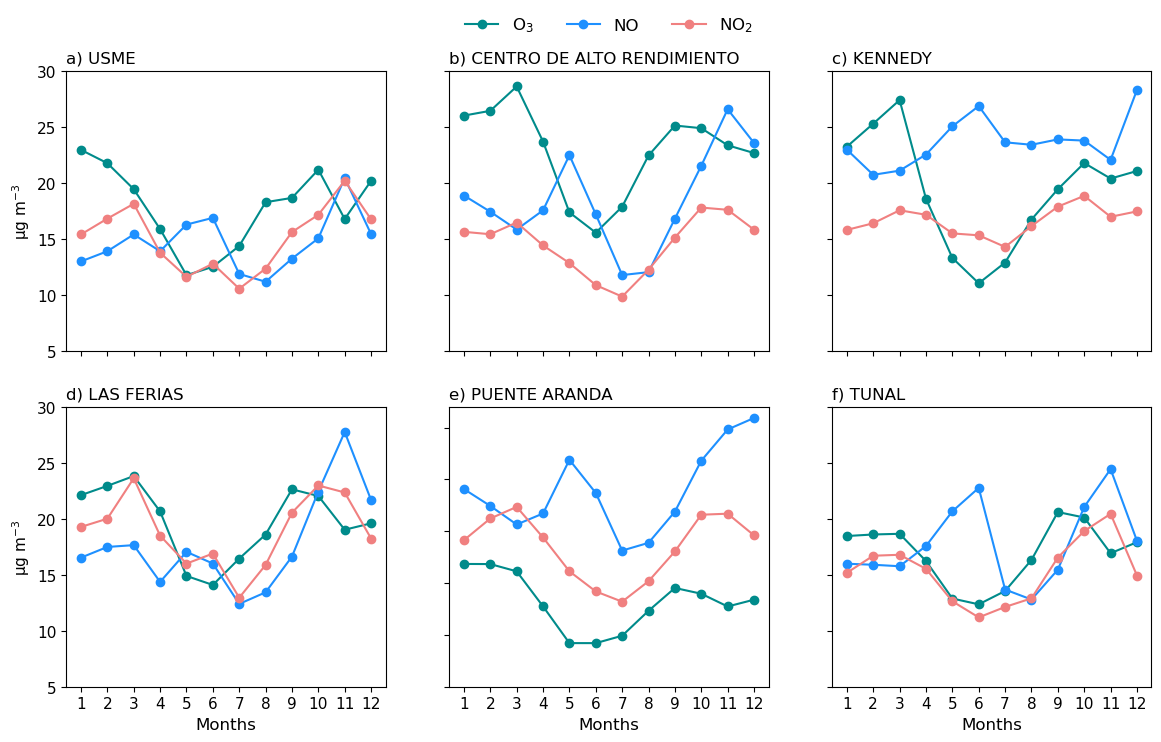

In [64]:
##VERSIÓN FINAL 
# Crear una figura con 2 filas y 3 columnas de subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Nombres de las estaciones
estaciones = ['USME', 'CENTRO DE ALTO RENDIMIENTO', 'KENNEDY', 'LAS FERIAS', 'PUENTE ARANDA', 'TUNAL']

# Nombres de las variables
variables = ['O$_{3}$', 'NO', 'NO$_{2}$']

# Colores correspondientes a las variables
colores = ['darkcyan', 'dodgerblue', 'lightcoral']

# Bucle para crear subplots y graficar los datos
for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        estacion = estaciones[i * 3 + j]  # Calcula la estación actual
        for k, variable in enumerate(variables):
            if variable == 'O$_{3}$':
                ax.plot(locals()[f'monmean'][estacion], '-o',label=variable, color=colores[k])
            elif variable == 'NO':
                ax.plot(locals()[f'monmeanno'][estacion], '-o',label=variable, color=colores[k])
            elif variable == 'NO$_{2}$':
                ax.plot(locals()[f'monmeanno2'][estacion], '-o', label=variable, color=colores[k])
        ax.set_title(f'{chr(97 + i * 3 + j)}) {estacion}', loc='left', fontsize=12)
        ax.set_yticks(np.arange(5, 31, 5))
        ax.set_xticks(np.arange(1, 13))
        if i == 0 and j == 1:
            ax.legend(fontsize=12, frameon=False, ncol=3, loc='upper center', bbox_to_anchor = (0.5, 1.25))
        if i == 1:
            ax.set_xlabel('Months', fontsize=12)
            ax.set_xticklabels(ax.get_xticks(), fontsize=11)
        else: 
            ax.set_xticklabels(ax.get_xticks(), visible=False)
       
        if j == 0:
            ax.set_ylabel('μg m$^{-3}$', fontsize=11)
            ax.set_yticklabels(ax.get_yticks(), fontsize=11)
        else: 
            ax.set_yticklabels(ax.get_yticks(), visible=False)

plt.show()

NameError: name 'monmean' is not defined

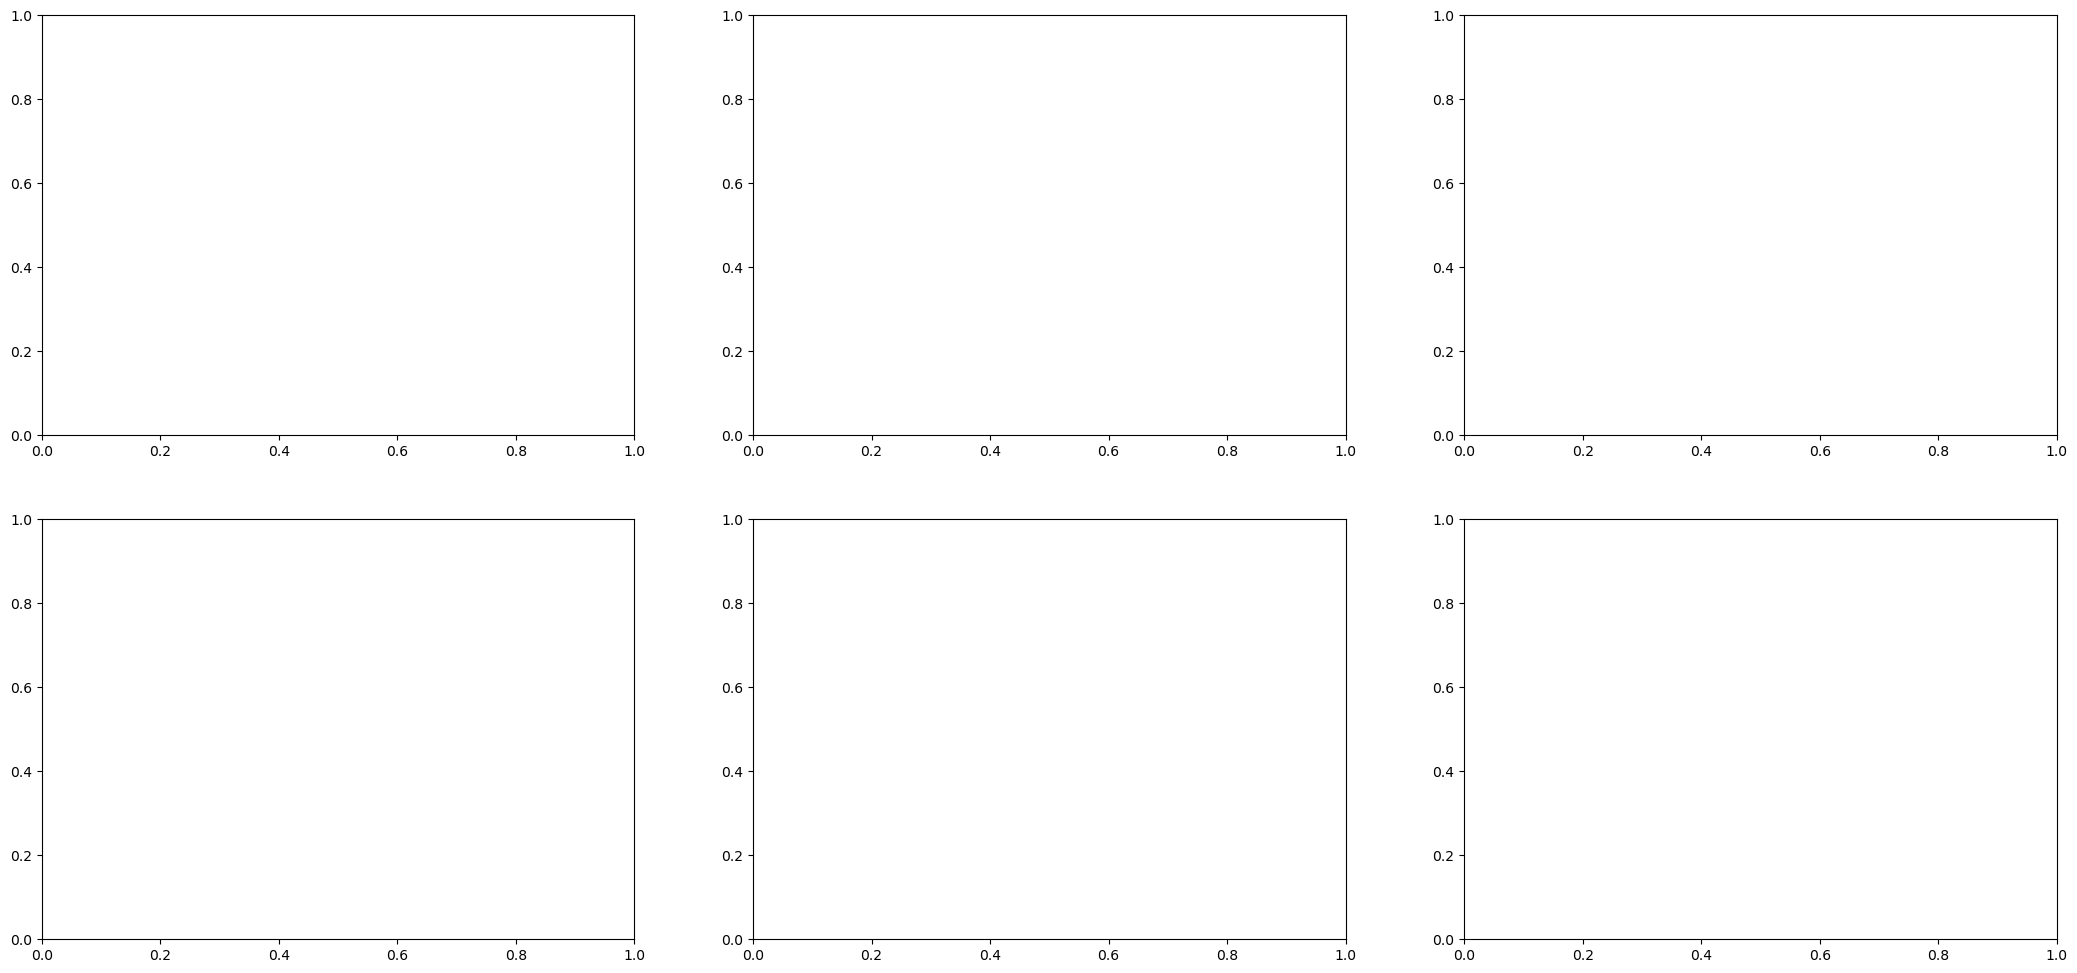

In [48]:
##Crear una figura con 8 subplots
fig, axs = plt.subplots(2, 3,figsize=(26,12))

##Graficar los boxplots para cada data
axs[0,0].plot(monmean['USME'], label='O3', color = 'turquoise')
axs[0,0].plot(monmeanno['USME'], label='NO', color = 'blueviolet')
axs[0,0].plot(monmeanno2['USME'], label='NO2', color = 'deeppink')
axs[0,0].set_title('a) Usme',loc = 'left',fontsize=24)
axs[0,0].set_ylabel('μg m$^{-3}$', fontsize = 22)
axs[0,0].set_yticks(np.arange(5,30.1,5))
axs[0,0].set_xticks(np.arange(1,12.1))
axs[0,0].legend(fontsize = 16)
axs[0,1].plot(monmean['CENTRO DE ALTO RENDIMIENTO'], label='O3', color = 'turquoise')
axs[0,1].plot(monmeanno['CENTRO DE ALTO RENDIMIENTO'], label='NO', color = 'blueviolet')
axs[0,1].plot(monmeanno2['CENTRO DE ALTO RENDIMIENTO'], label='NO2', color = 'deeppink')
axs[0,1].set_title('b) CDAR',loc = 'left',fontsize=18)
axs[0,1].set_yticks(np.arange(5,30.1,5))
axs[0,1].legend()
axs[0,2].plot(monmean['KENNEDY'], label='O3', color = 'turquoise')
axs[0,2].plot(monmeanno['KENNEDY'], label='NO', color = 'blueviolet')
axs[0,2].plot(monmeanno2['KENNEDY'], label='NO2', color = 'deeppink')
axs[0,2].set_title('c) Kennedy',loc = 'left', fontsize=18)
axs[0,2].set_ylim(9,30)
axs[0,2].legend()
axs[1,0].plot(monmean['LAS FERIAS'], label='O3', color = 'turquoise')
axs[1,0].plot(monmeanno['LAS FERIAS'], label='NO', color = 'blueviolet')
axs[1,0].plot(monmeanno2['LAS FERIAS'], label='NO2', color = 'deeppink')
axs[1,0].set_title('d) Las Ferias',loc = 'left', fontsize=18)
axs[1,0].set_xlabel('Meses', fontsize = 15)
axs[1,0].set_ylabel('μg m$^{-3}$', fontsize = 15)
axs[1,0].set_ylim(9,30)
axs[1,0].legend()
axs[1,1].plot(monmean['PUENTE ARANDA'], label='O3', color = 'turquoise')
axs[1,1].plot(monmeanno['PUENTE ARANDA'], label='NO', color = 'blueviolet')
axs[1,1].plot(monmeanno2['PUENTE ARANDA'], label='NO2', color = 'deeppink')
axs[1,1].set_title('e) Puente Aranda',loc = 'left',fontsize=18)
axs[1,1].set_xlabel('Meses', fontsize = 15)
axs[1,1].set_ylim(9,30)
axs[1,1].legend()
axs[1,2].plot(monmean['TUNAL'], label='O3', color = 'turquoise')
axs[1,2].plot(monmeanno['TUNAL'], label='NO', color = 'blueviolet')
axs[1,2].plot(monmeanno2['TUNAL'], label='NO2', color = 'deeppink')
axs[1,2].set_title('f) Tunal',loc = 'left', fontsize=18)
axs[1,2].set_xlabel('Meses', fontsize = 15)
axs[1,2].set_ylim(9,30)
axs[1,2].legend()

plt.show()

KeyError: 'monmean'

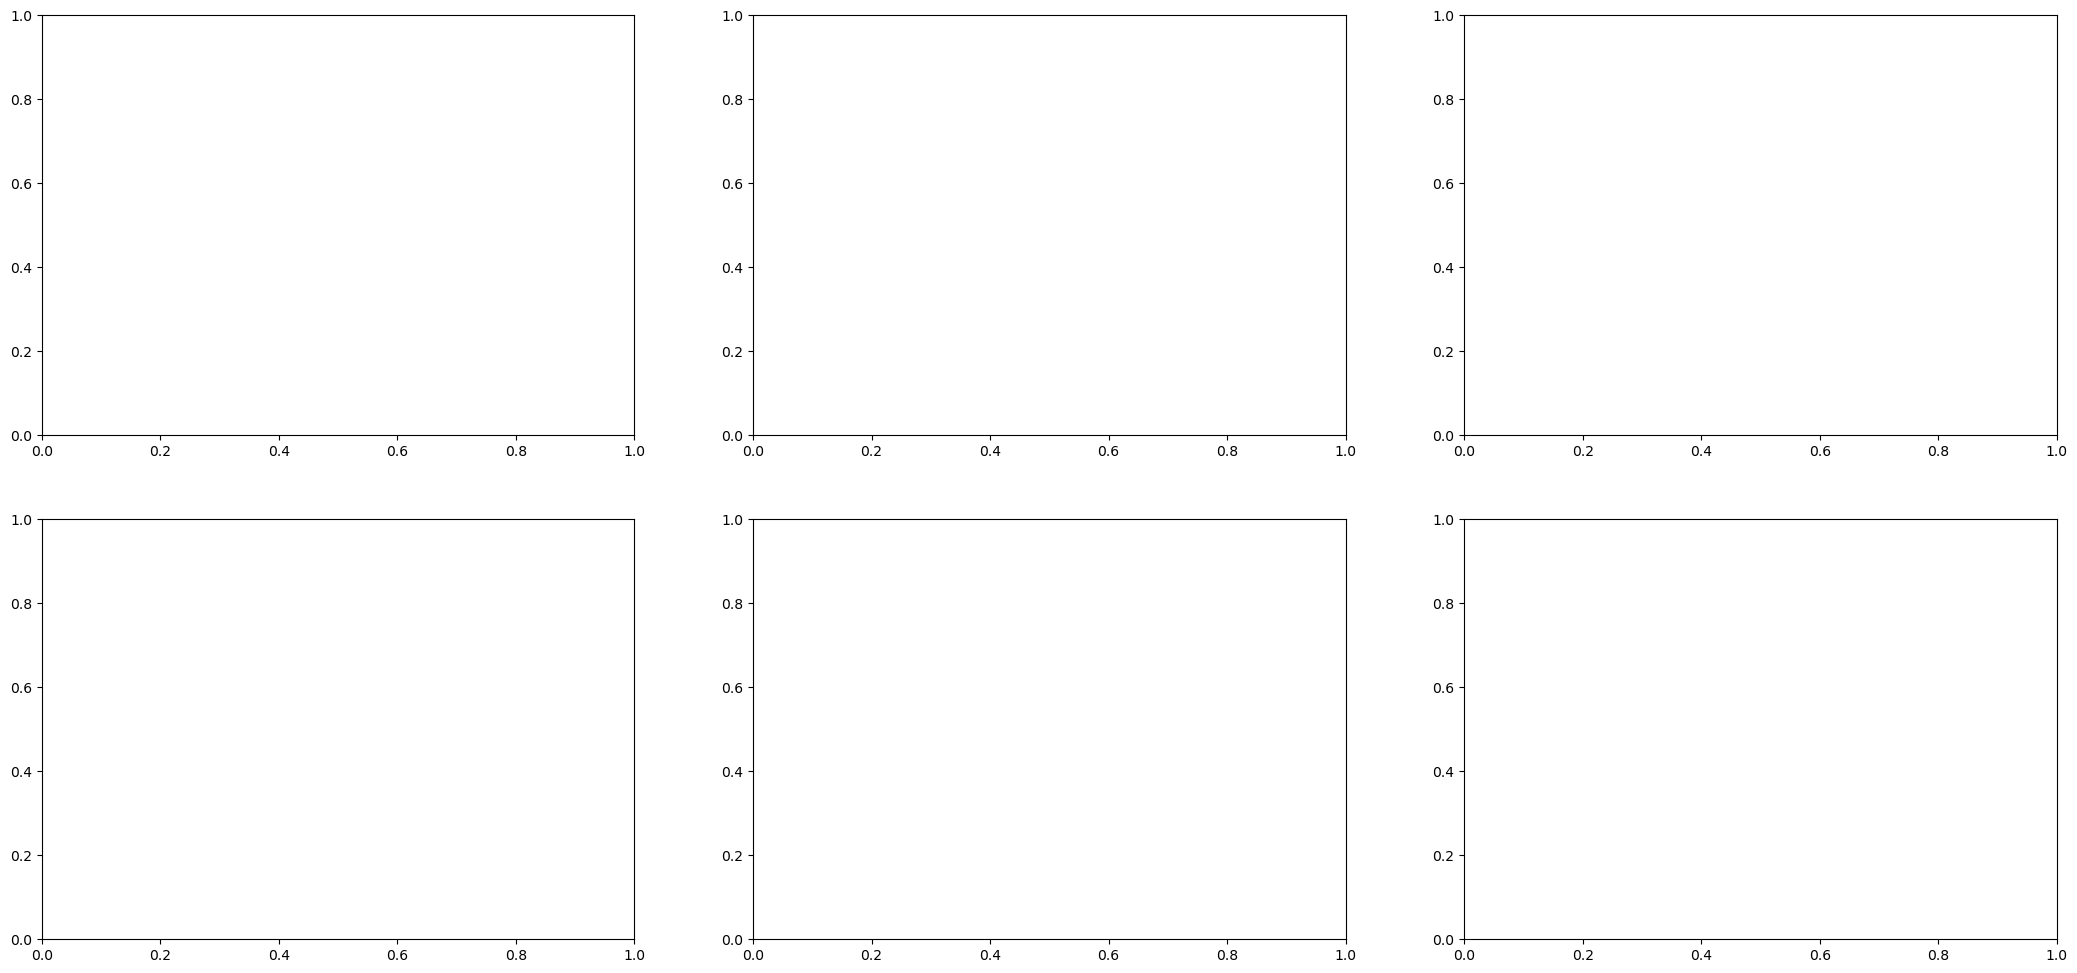

In [49]:
fig, axs = plt.subplots(2, 3, figsize=(26, 12))

# Nombres de las estaciones
estaciones = ['USME', 'CENTRO DE ALTO RENDIMIENTO', 'KENNEDY', 'LAS FERIAS', 'PUENTE ARANDA', 'TUNAL']

# Nombres de las variables
variables = ['O3', 'NO', 'NO2']

# Colores correspondientes a las variables
colores = ['turquoise', 'blueviolet', 'deeppink']

# Bucle para crear subplots y graficar los datos
for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        estacion = estaciones[i * 3 + j]  # Calcula la estación actual
        for k, variable in enumerate(variables):
            if variable == 'O3':
                ax.plot(locals()[f'monmean'][estacion], label=variable, color=colores[k])
            elif variable == 'NO':
                ax.plot(locals()[f'monmeanno'][estacion], label=variable, color=colores[k])
            elif variable == 'NO2':
                ax.plot(locals()[f'monmeanno2'][estacion], label=variable, color=colores[k])
        
        ax.set_title(f'{chr(97 + i * 3 + j)}) {estacion}', loc='left', fontsize=18)
        ax.set_yticks(np.arange(5, 30.1, 5))
        ax.set_xticks(np.arange(1, 12.1))
        
        if i == 1:
            ax.set_xlabel('Meses', fontsize=15)
            ax.set_ylim(9, 30)
            ax.set_xticklabels(ax.get_xticks(), fontsize=14, fontweight='bold')#tamaño de letra y negrilla
            
        if (i == 0 and j == 0) or (i == 1 and j == 0):
            ax.set_ylabel('μg m$^{-3}$', fontsize=22)
            ax.set_yticklabels(ax.get_yticks(), fontsize=20, fontweight='bold') #tamaño de letra y negrilla
            
        if j != 0:
            ax.set_yticklabels([])  # Eliminar etiquetas en el eje Y
        if i == 0:
            ax.set_xticklabels([])  # Eliminar etiquetas en el eje X para la primera fila de subplots
        
        if (i == 0 and j != 0) or (i == 1 and j != 0):
            ax.legend(fontsize=16)

plt.show()